In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pylab import rcParams

import matplotlib.pyplot as plt





Importing the Dependencies

Data Collection and Processing

In [3]:
heart_data = pd.read_csv('heart.csv')

In [4]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
heart_data.shape 

(303, 14)

In [7]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# checking the distribution of output variables
heart_data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

1 -- > defective heart (more likely to have a heart attack)

0 -- > healthy heart (less likely to have a heart attack)

Outliers

<AxesSubplot:>

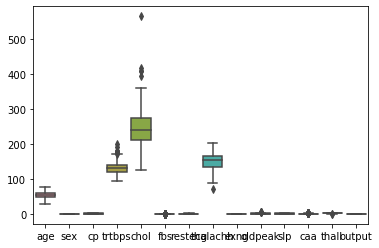

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=heart_data)

Function that remove outliers

In [12]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)                  
    IQR = Q3 - Q1
    
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    ls= df.index[(df[ft] < low_bound) | (df[ft]> up_bound)]
    return ls

Cleaning the dataset according to cholesterol

In [13]:
index_list = []
for feature in ['output','chol']:
    index_list.extend(outliers(heart_data,feature))
index_list

[28, 85, 96, 220, 246]

In [14]:
def remove(df,ls):
    ls = sorted(set(ls))
    df=df.drop(ls)
    return df
df = remove(heart_data,index_list)

<AxesSubplot:>

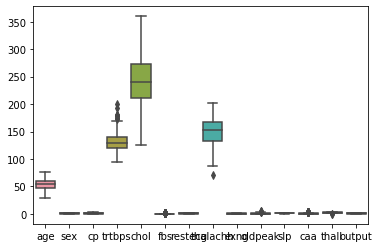

In [15]:
sns.boxplot(data=df)

Cleaning the dataset according to trtbps

In [16]:
index_list = []
for feature in ['output','trtbps']:
    index_list.extend(outliers(df,feature))
index_list

[8, 101, 110, 203, 223, 241, 248, 260, 266]

In [17]:
df = remove(df,index_list)

<AxesSubplot:>

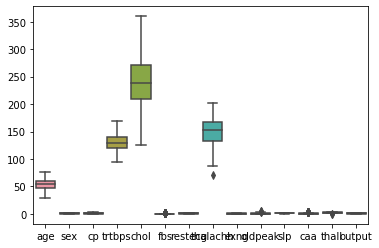

In [18]:
sns.boxplot(data=df)

Cleaning the dataset according to thalachh

In [19]:
index_list = []
for feature in ['output','thalachh']:
    index_list.extend(outliers(df,feature))
index_list

[272]

In [20]:
df = remove(df,index_list)

<AxesSubplot:>

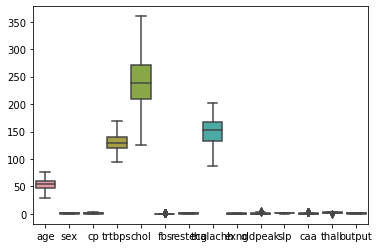

In [21]:
sns.boxplot(data=df)

Splitting Data

In [36]:
X = df.drop(columns='output', axis=1)
Y = df['output']

In [37]:
print(X)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [38]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 288, dtype: int64


In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=4)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(288, 13) (230, 13) (58, 13)


# Model Training

Logistic Regression Model

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X_train, Y_train)

C:\Users\tonyy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy Score

In [43]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8739130434782608


In [45]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8103448275862069


Predicitive System

In [47]:
input_data = (57,0,0,120,354,0,1,163,1,0.6,2,0,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The person is not prone to heart attacks')
else:
  print('The person is prone to having a heart attack')



[1]
The person is prone to having a heart attack


In [48]:
input_data = (63,1,0,130,254,0,0,147,0,1.4,1,1,3)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The person is not prone to heart attacks')
else:
  print('The person is prone to having a heart attack')

[0]
The person is not prone to heart attacks
